<a href="https://colab.research.google.com/github/ChukwukaE/TAANG/blob/main/stock_analysis_and_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stocks Analysis 


In this notebook I will be looking exploring 6 stocks 'MTAANG' from NASDAQ 100, I will use pandas to get stock information from yahoo finance, and seaborn/ matplotlib to produce visualizations, I will conlude with risk analysis and with previous performance history, I will be predicting future prices through a Long Short Term Memory (LSTM).

Below is the itemized process of my analysis:

    1.) Retriving data from yahoo finance and descriptive statistics.
    2.) Moving Averages [10, 20, 50]
    3.) Average Daily Return
    4.) Are theses tocks correlated?
    5.) Risk of investing
    6.) Predicting the closing price stock price of NETFLIX using LSTM)
   

# 1. Retriving data from yahoo finance and descriptive statistics.

In [49]:
#Upgrade and install 
# !pip install -q hvplot
# !pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# time stamps
from datetime import datetime

In [52]:
# Selected Tech stocks for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NFLX']

# Set End and Start times for data
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NFLX']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploring Netflix, NFLX Dataframe

In [54]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NFLX]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", 'TESLA','NETFLIX']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-20,272.779999,278.380005,266.380005,268.160004,268.160004,17207100,NETFLIX
2022-10-21,268.950012,290.750000,265.679993,289.570007,289.570007,24862700,NETFLIX
2022-10-24,290.230011,290.480011,280.359985,282.450012,282.450012,13139518,NETFLIX


In [55]:
# Summary Stats
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,351.854802,357.919166,344.487222,351.003572,351.003572,9.635623e+06
std,171.538851,171.839328,169.282911,170.051483,170.051483,1.131741e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,215.934998,225.002499,211.610001,217.707504,217.707504,4.351075e+06
50%,257.400002,265.185005,255.084999,258.730003,258.730003,6.897150e+06
75%,424.320000,434.940010,409.595001,427.725014,427.725014,1.124798e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [56]:
# General info
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-10-25 to 2022-10-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


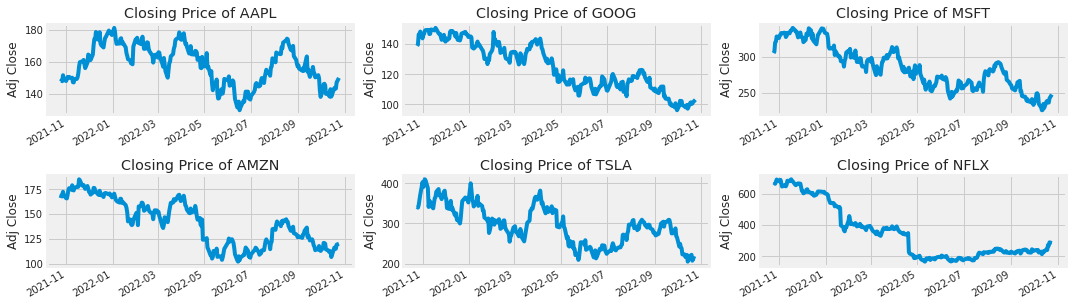

In [27]:
# historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

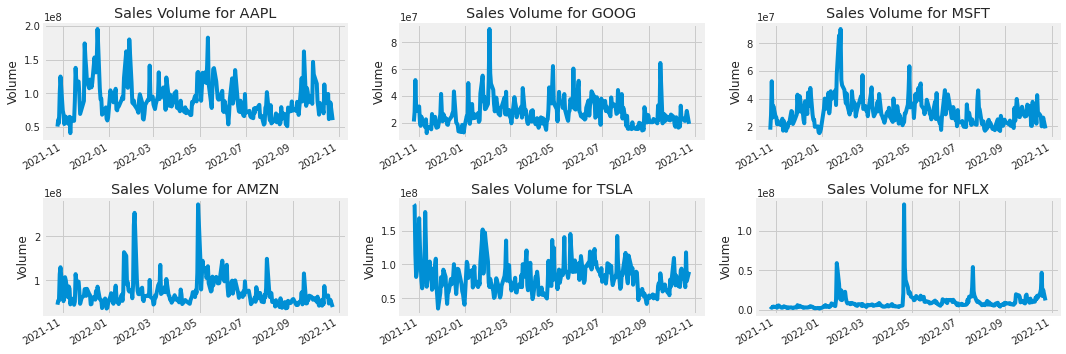

In [28]:
# total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. Moving Averages [10, 20, 50]

In [57]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Plotting all Moving Averages

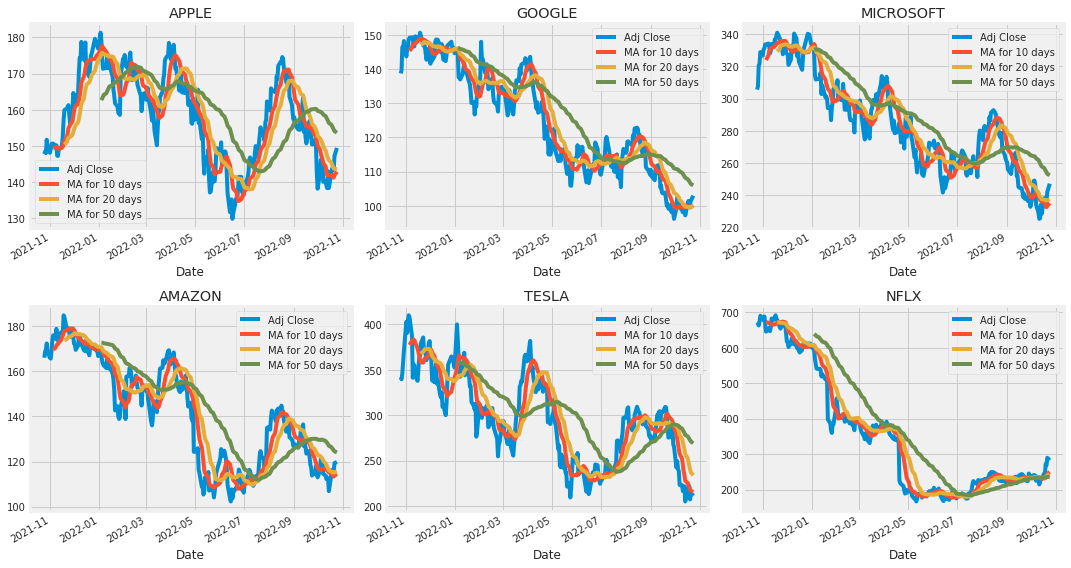

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('NFLX')

fig.tight_layout()

# 3. Average Daily Return


I dove deeper into the daily returns, Usually data traders utilize these metrics to open or close daily positions, Visually we can concluse that NETFlIX seems to yeild a better daily return or has the Higest volatility amongst the FAANGT stocks but more analysis needs to be caried out for volatility check like the EWMA

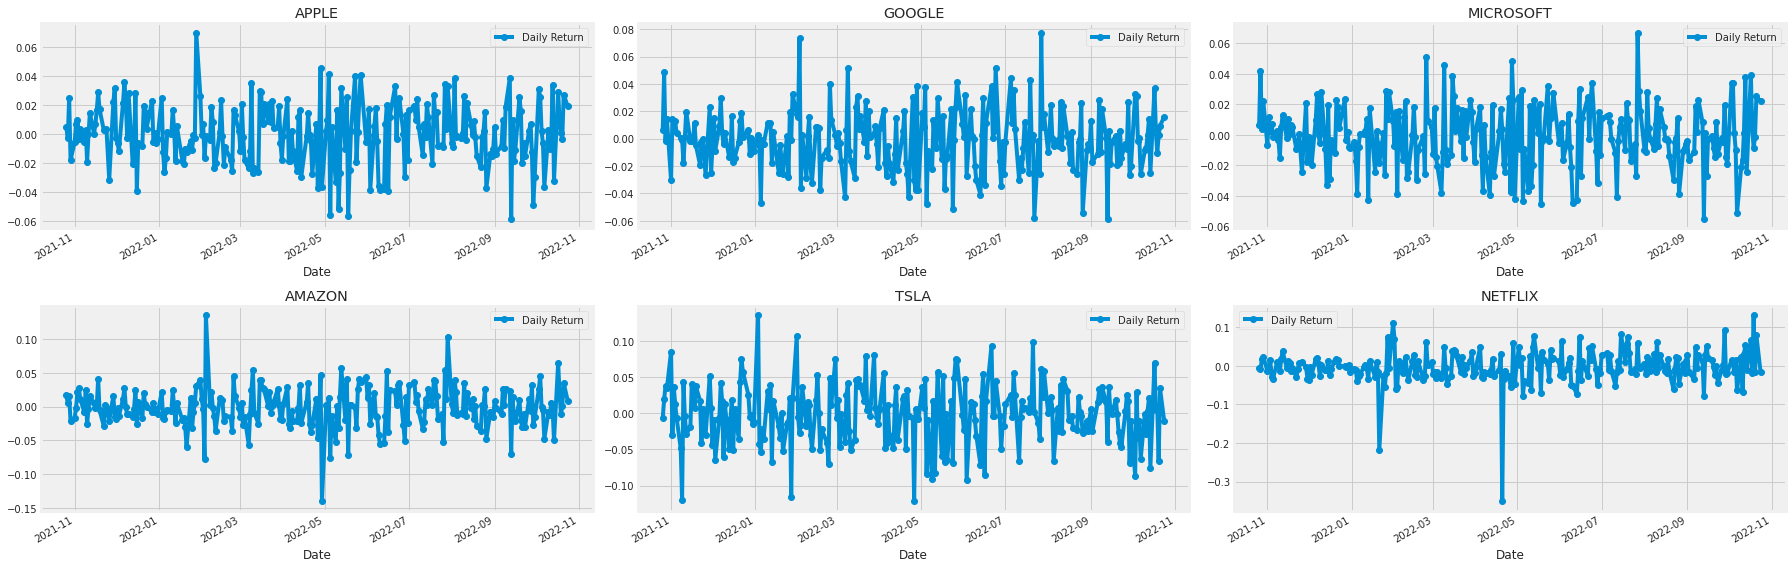

In [35]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(25)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='solid', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='solid', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='solid', marker='o')
axes[0,2].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='solid', marker='o')
axes[1,0].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='solid', marker='o')
axes[1,1].set_title('TSLA')

NFLX['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='solid', marker='o')
axes[1,2].set_title('NETFLIX')

fig.tight_layout()

Great, An insight into the distribution pattern of daily return using a histogram.

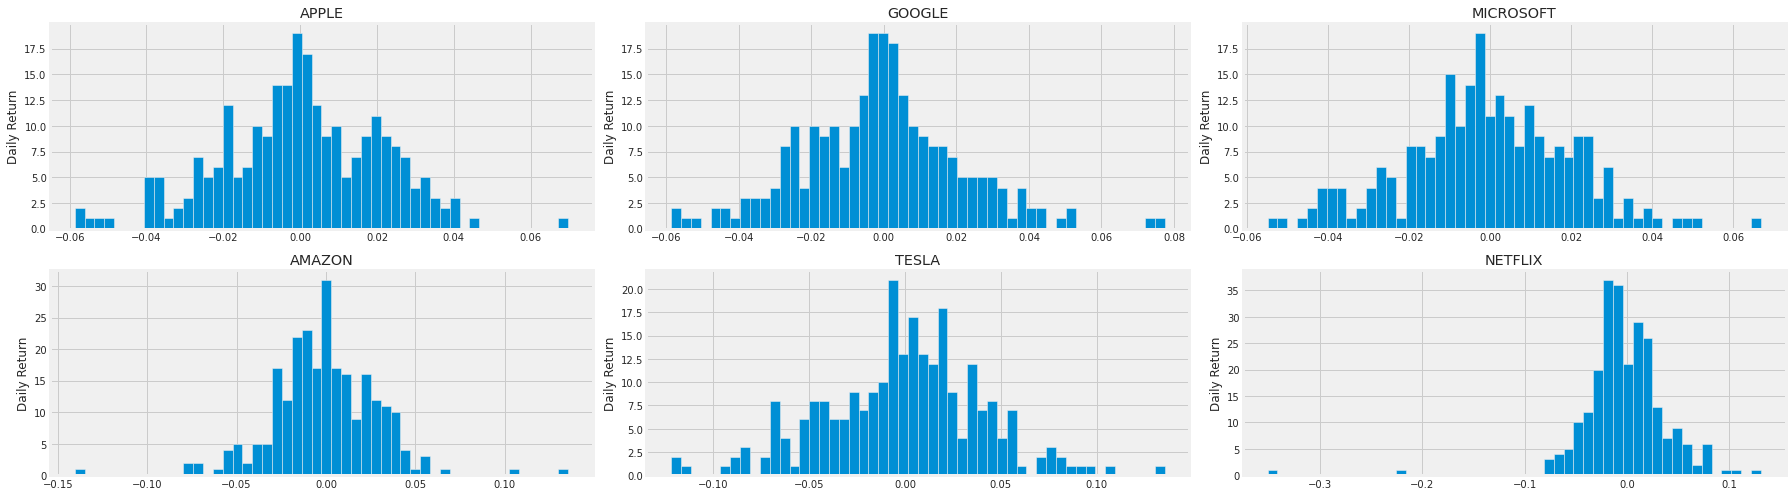

In [38]:
plt.figure(figsize=(25, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. Are these stocks correlated?

Creating a DataFrame with all the ['Adj Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

#Let's take a quick look
closing_df.tail() 


#for symbol in ['AAPL', 'TSLA']:
#    try:
#        f = DataReader(symbol, 'yahoo', "2001-01-01", "2010-01-01")
#        print (f.head(5))
#    except:
#        print ('did not find: '+symbol)

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,NFLX
Date,,,,,,
2021-10-25,147.811737,138.772995,305.570862,166.018494,341.619995,671.659973
2021-10-26,148.487946,139.671997,307.534393,168.803497,339.476654,668.520020
2021-10-27,148.020569,146.427505,320.485931,169.624496,345.953339,662.919983
2021-10-28,151.719833,146.128998,321.656097,172.328506,359.013336,674.049988
2021-10-29,148.965256,148.270493,328.865753,168.621506,371.333344,690.309998


Generating Daily Returns

In [15]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,NFLX
Date,,,,,,
2022-10-18,0.009409,0.006053,0.004084,0.022585,0.003829,-0.017299
2022-10-19,0.000765,-0.010849,-0.008470,-0.011086,0.008402,0.130864
2022-10-20,-0.003267,0.002393,-0.001395,0.001564,-0.066474,-0.015493
2022-10-21,0.027059,0.009450,0.025281,0.035315,0.034543,0.079840
2022-10-24,0.014803,0.014683,0.021188,0.004190,-0.014876,-0.024588


In [20]:
tech_rets.AAPL.head()

Date
2021-10-25         NaN
2021-10-26    0.004575
2021-10-27   -0.003148
2021-10-28    0.024992
2021-10-29   -0.018156
Name: AAPL, dtype: float64

Compare daily correlation between APPLE and NETFLIX

Pearsons correlation coefficient: 0.461


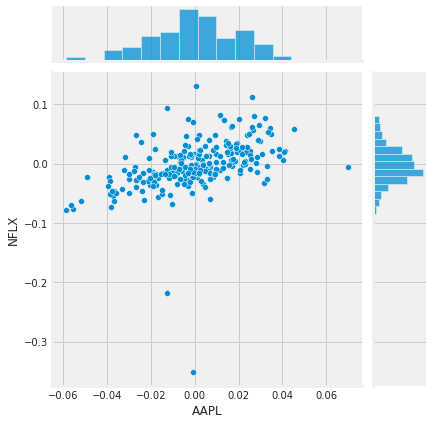

In [30]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
from scipy.stats import pearsonr
# calculate Pearson's correlation

sns.jointplot(x='AAPL', y='NFLX', data=tech_rets, kind='scatter')
tech_rtns = tech_rets.dropna()
corr, _ = pearsonr(tech_rtns.AAPL, tech_rtns.NFLX)
print('Pearsons correlation coefficient: %.3f' % corr)

With a correlation coefficient of 0.461, there is weak positivley correlation between the daily returns of both stocks.

Seaborn is used to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list.

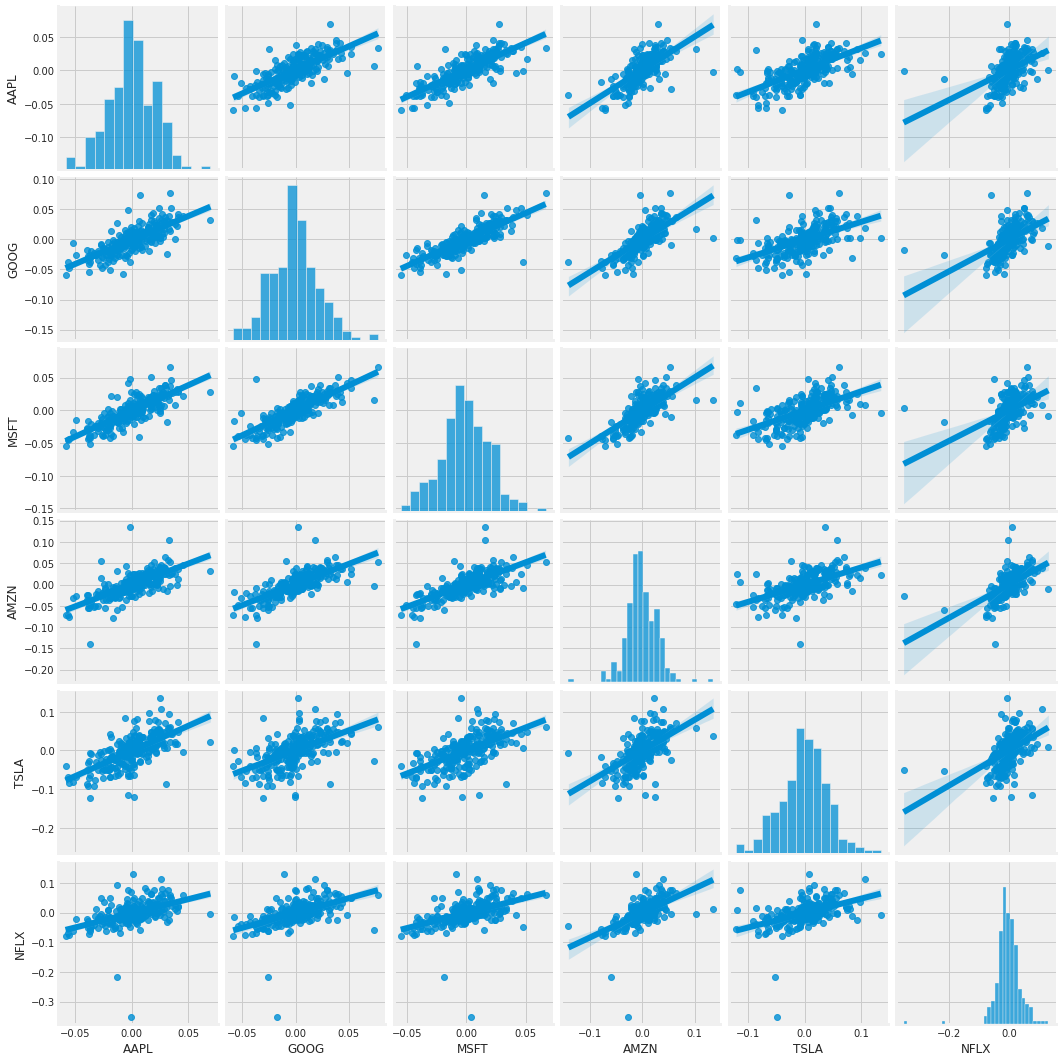

In [31]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

From the Visualization of all the relationship above, We observe majorly positive correlation amongst all the pairs however,  I went further to investigate that individual comparison.

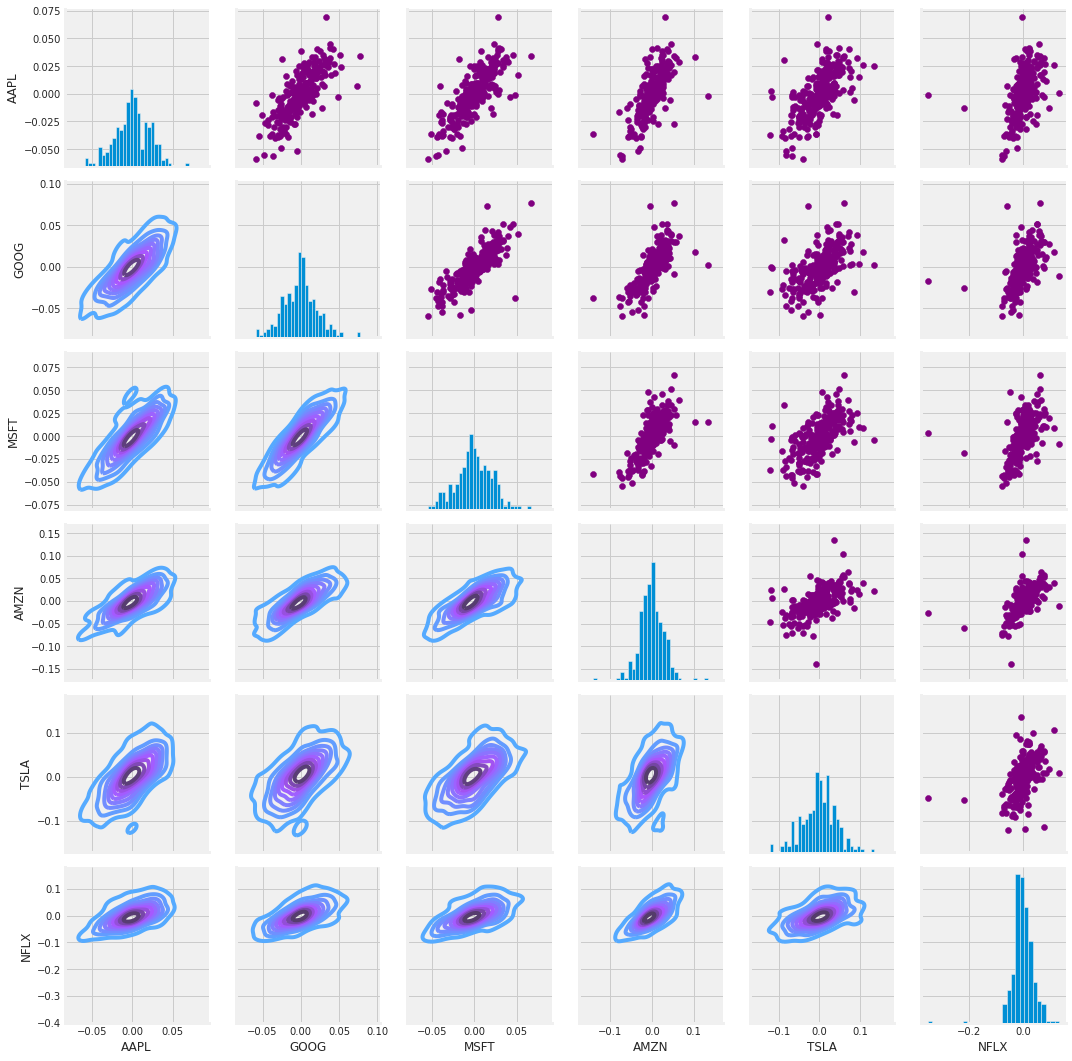

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, I concluded  displaying the correlation cofficients amongsts all 6 stocks daily returns and closing price

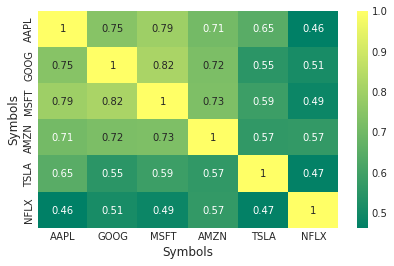

In [33]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

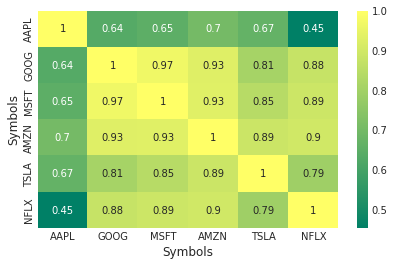

In [34]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

As specified earlier, All stocks seems o be positive correlation however the closing prices yeild a stronger positive correlation than the percentage change.

# 5. Risk of investing

Below is the Basic risk analysis for the daily percentage returns of all stocks in the tech_list.

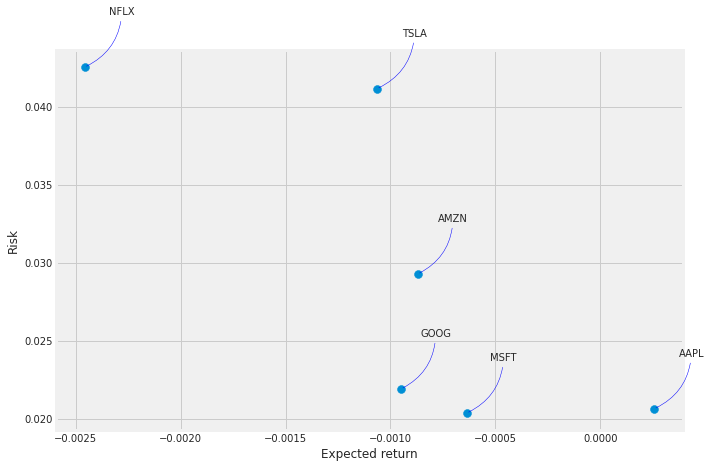

In [36]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

As seen above, NFLX possess a High Risk low reward while AAPL is the inverse which is low risk, High reward, however, this rule is invalidated in derivative trading.

# 6. Predicting the closing price stock price of NETFLIX :

In [37]:
# Get the stock quote
df = DataReader('NFLX', data_source='yahoo', start='2012-01-01', end=datetime.now())

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714


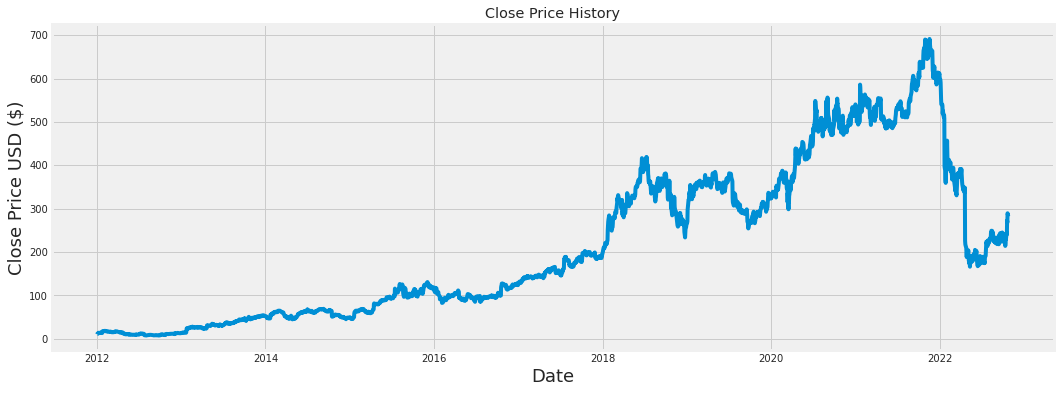

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe 
data = df.filter(['Adj Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2585

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00385127],
       [0.00556596],
       [0.00532578],
       ...,
       [0.38080798],
       [0.41210896],
       [0.40169967]])

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.00969919, 0.00838758, 0.00811816,
       0.00861315, 0.01299282, 0.0146177 , 0.01496022, 0.01386792,
       0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.01421253, 0.01328313, 0.01223885,
       0.01236208, 0.01208639, 0.01161438, 0.012431  , 0.01189007,
       0.01231195, 0.01280276, 0.01190678, 0.01113819, 0.01073302,
       0.01133452, 0.0115559 , 0.01094396, 0.01097529, 0.01074555,
       0.01177311, 0.01172925, 0.01264194, 0.01278605, 0.01384703,
       0.0135609 , 0.01386583, 0.01424177, 0.01396608, 0.01357761])]
[0.012792318847363655]

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.0

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2525/2525 [==============================] - 93s 36ms/step - loss: 0.0012


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 34ms/step


19.38793272854398

In [60]:
# Display Actual and predicted prices
valid

,Adj Close,Predictions
Date,,
2022-04-11,348.000000,337.513794
2022-04-12,344.100006,332.097656
2022-04-13,350.429993,326.977325
2022-04-14,341.130005,324.355408
2022-04-18,337.859985,321.552551
...,...,...
2022-10-18,240.860001,220.893646
2022-10-19,272.380005,224.257111
2022-10-20,268.160004,232.429535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


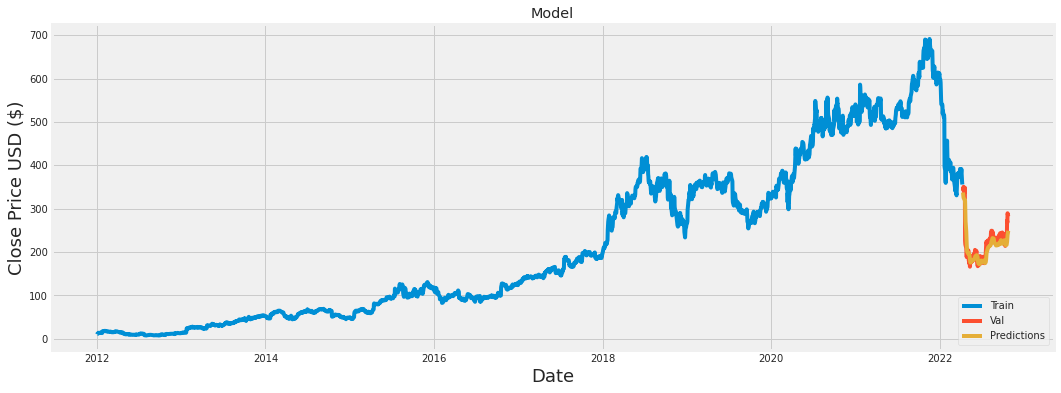

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()